# *Credit Card Churn Prediction*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


## Loading dataset


In [2]:
churn = pd.read_csv('Churn_Modelling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding , Correlation Matrix

In [3]:
from sklearn.preprocessing import LabelEncoder

char_features = churn.select_dtypes(exclude=['int', 'float']).columns.tolist()
encoder = LabelEncoder()
churn[char_features] = churn[char_features].apply(encoder.fit_transform)

churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#crearing correlation matrix
corr_matrix = churn.corr()
#print(corr_matrix)
cdf = pd.DataFrame(corr_matrix)

threshold = 0.8
highly_correlated = corr_matrix[(corr_matrix > threshold) & (corr_matrix != 1)]

columns_to_drop = []
for col in highly_correlated.columns:
    if len(highly_correlated[col].dropna()) > 0:
        columns_to_drop.append(col)




## Scaling and Splitting dataset

In [5]:
# Drop the selected columns
X = churn.drop(columns=columns_to_drop + ['Exited'],axis=1).values
y = churn['Exited'].values

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#X_train,X_test,y_train,y_test = train_test_split(churn_df_pca,y,test_size=0.3,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test.shape,y_test.shape,X_train.shape,y_train.shape

((3000, 13), (3000,), (7000, 13), (7000,))

In [7]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn.info()
churn.describe()
churn.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  float64
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  float64
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  float64
 5   Gender           10000 non-null  float64
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 1.1 MB


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## PCA

In [ ]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

churn_df_pca = pd.DataFrame(data=pca_fit, columns=['PC1'])

In [ ]:
churn_df_pca.head()

,PC1
0,-0.021886
1,-0.216534
2,-0.240687
3,0.108918
4,0.365276


## Model Architecture

In [8]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


### Adding Hidden Layers

In [9]:
input_shape = (X_train.shape[1],)

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=input_shape))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=3)
model.fit(X_train, y_train, epochs=30, verbose=1,validation_split=0.3,callbacks = [early_stopping_monitor])

loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7900 - loss: 0.8062 - val_accuracy: 0.7890 - val_loss: 0.5343
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7917 - loss: 0.5219 - val_accuracy: 0.7905 - val_loss: 0.5016
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8102 - loss: 0.4794 - val_accuracy: 0.7952 - val_loss: 0.4794
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8132 - loss: 0.4505 - val_accuracy: 0.8057 - val_loss: 0.4554
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8160 - loss: 0.4384 - val_accuracy: 0.8138 - val_loss: 0.4321
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8225 - loss: 0.4250 - val_accuracy: 0.8252 - val_loss: 0.4175
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8359 - loss: 0.4059 - val_accuracy: 0.8210 - val_loss: 0.4134
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8274 - loss: 0.4051 - val_accu

In [18]:
predictions = model.predict(X_test)
print(predictions,"\n")


actual_values = y_test
predicted_classes = (predictions > 0.5).astype(int)

pre_vs_act = pd.DataFrame({'Predicted': predictions.flatten(), 'Actual': actual_values})
pre_vs_act['Predicted'] = (pre_vs_act['Predicted'] > 0.5).astype(int)

print('Test accuracy:', accuracy)
pre_vs_act.head()

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.03542138]
 [0.14357793]
 [0.07081005]
 ...
 [0.22483693]
 [0.24412401]
 [0.00953947]] 

Test accuracy: 0.8503333333333334


,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


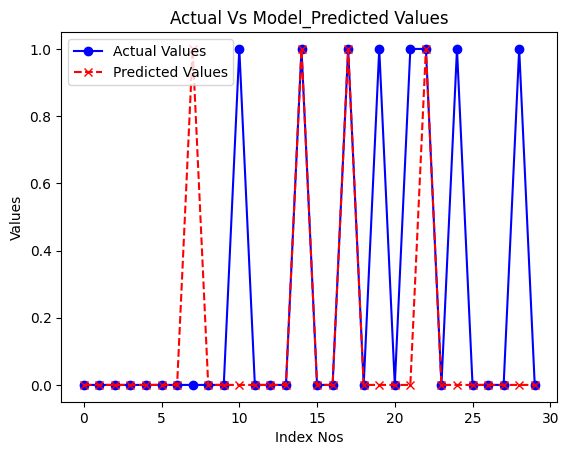

In [39]:
import matplotlib.pyplot as plt

plt.plot(pre_vs_act.index[:30], pre_vs_act['Actual'][:30].to_numpy(), marker='o', linestyle='-', color='b', label='Actual Values')
plt.plot(pre_vs_act.index[:30], pre_vs_act['Predicted'][:30].to_numpy(), marker='x', linestyle='--', color='r', label='Predicted Values')


plt.title('Actual Vs Model_Predicted Values')
plt.xlabel('Index Nos')
plt.ylabel('Values')

plt.legend()
plt.show()